<a href="https://colab.research.google.com/github/jumbokh/python_learn/blob/master/notebooks/cvColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 照片人臉偵測
### 使用 OpenCV 與 Dlib 開發人臉偵測程式: shorturl.at/guwNR
### OpenCV 擷取網路攝影機影像: shorturl.at/oIT19

In [2]:
import dlib
import cv2
import imutils

In [3]:
# 讀取照片圖檔
img = cv2.imread('image.jpg')

# 縮小圖片
img = imutils.resize(img, width=1280)

In [4]:
# Dlib 的人臉偵測器
detector = dlib.get_frontal_face_detector()

# 偵測人臉
face_rects = detector(img, 0)

In [5]:
# 取出所有偵測的結果
for i, d in enumerate(face_rects):
  x1 = d.left()
  y1 = d.top()
  x2 = d.right()
  y2 = d.bottom()
   # 以方框標示偵測的人臉
  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 4, cv2.LINE_AA)

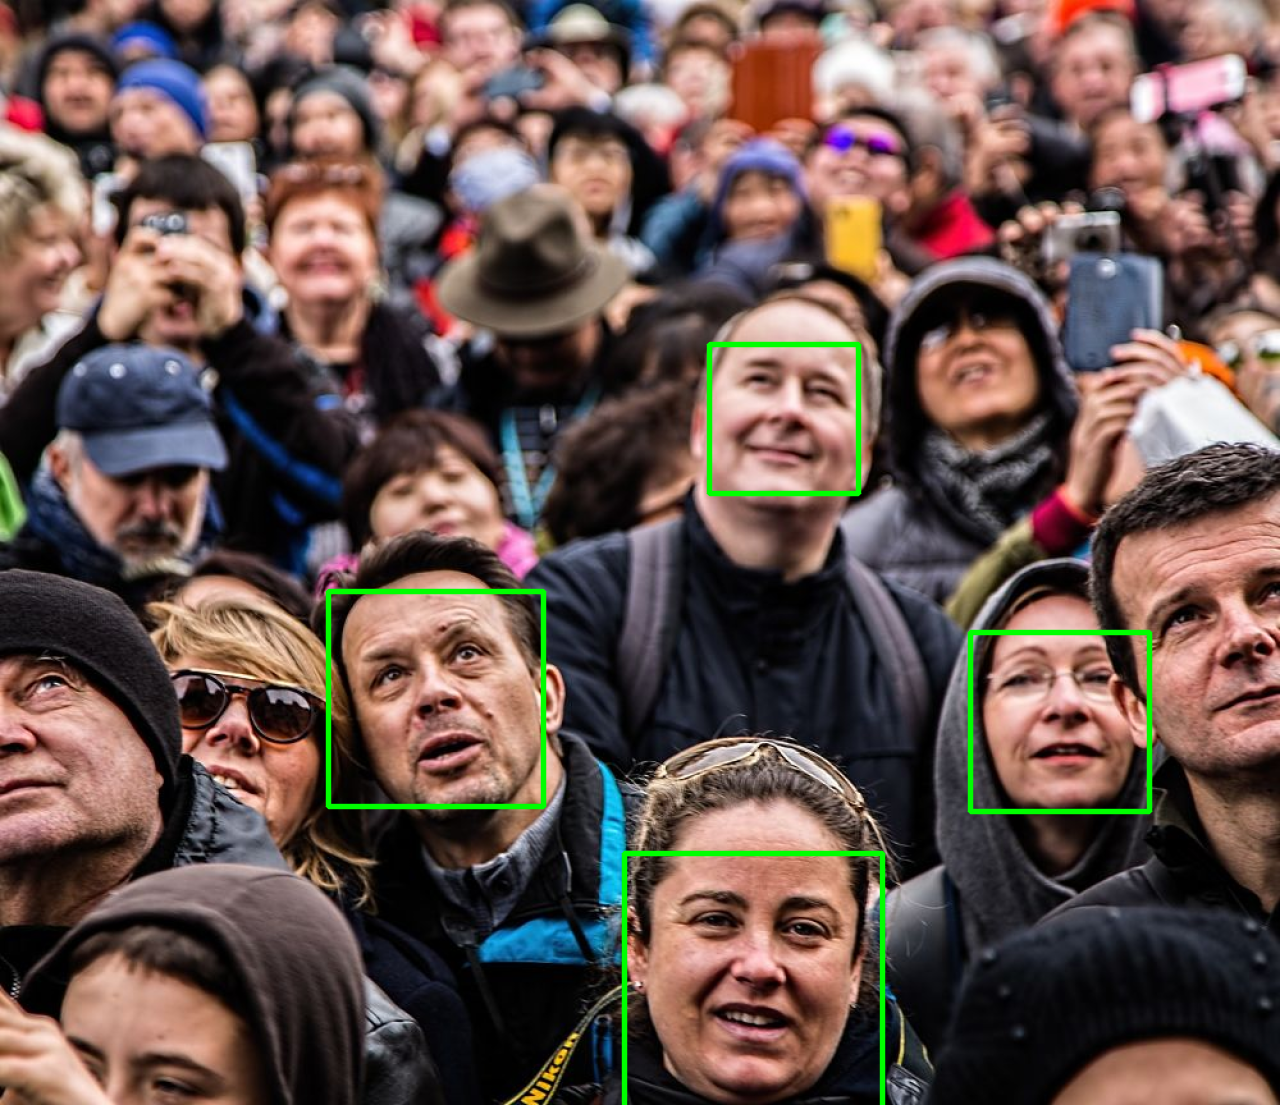

In [6]:
# 顯示結果
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [7]:
import dlib
import cv2
import imutils

img = cv2.imread('human-740259_1280.jpg')
img = imutils.resize(img, width=1280)
detector = dlib.get_frontal_face_detector()

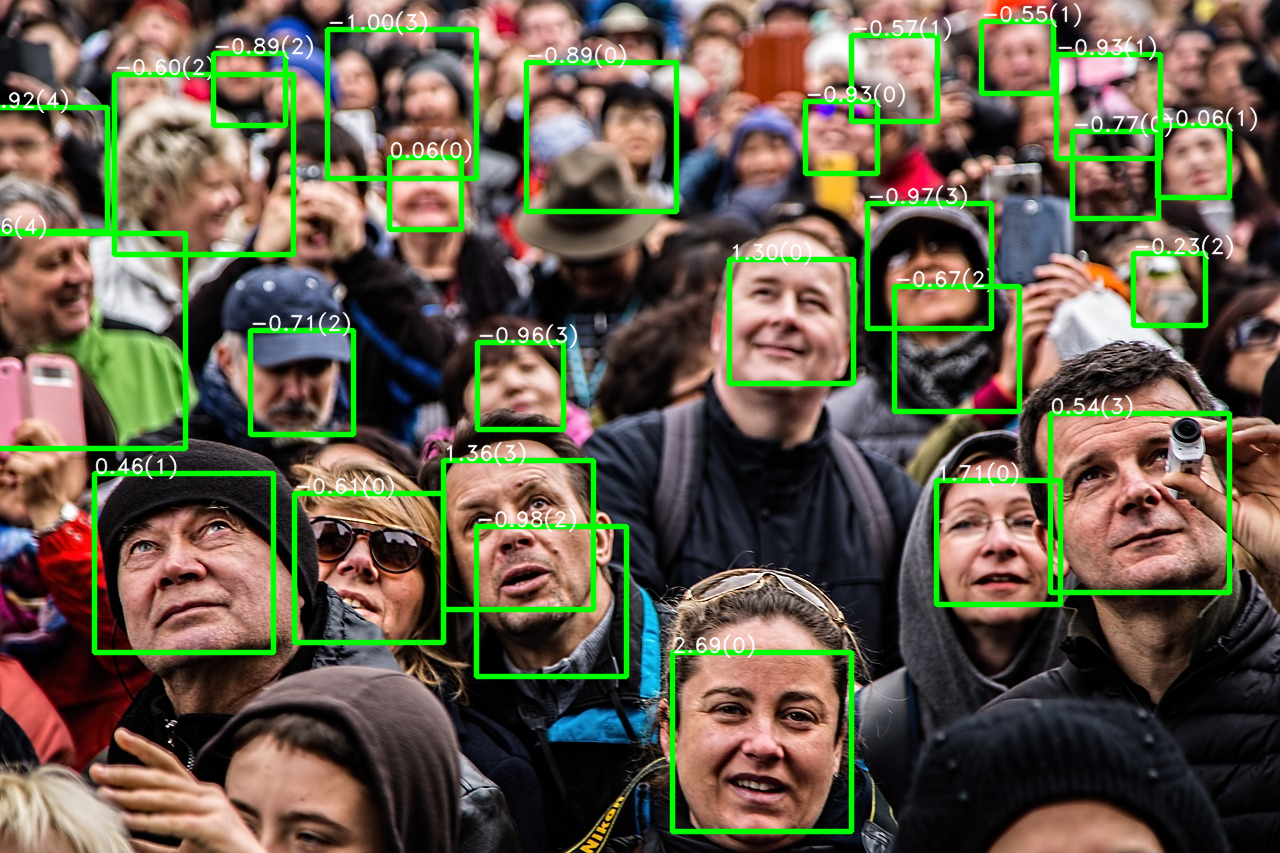

In [8]:
# 偵測人臉，輸出分數
face_rects, scores, idx = detector.run(img, 0, -1)

for i, d in enumerate(face_rects):
  x1 = d.left()
  y1 = d.top()
  x2 = d.right()
  y2 = d.bottom()
  text = "%2.2f(%d)" % (scores[i], idx[i])

  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 4, cv2.LINE_AA)

  # 標示分數
  cv2.putText(img, text, (x1, y1), cv2.FONT_HERSHEY_DUPLEX,
          0.7, (255, 255, 255), 1, cv2.LINE_AA)
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [9]:
print("Image size:",img.shape)

Image size: (853, 1280, 3)


In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


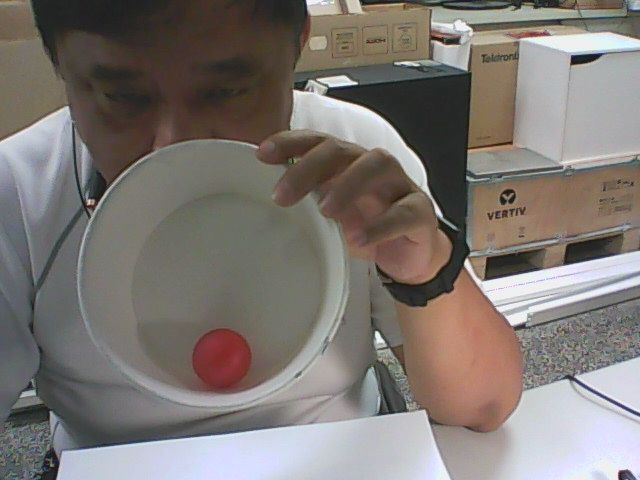

In [13]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [14]:
import dlib
import cv2
import imutils

img = cv2.imread('redBall2.jpg')
print("before:",img.shape)
img = imutils.resize(img, width=1280)
print("after:",img.shape)

before: (78, 80, 3)
after: (1248, 1280, 3)


In [15]:
img1 = cv2.imread('photo.jpg')
print("before:",img1.shape)
img1 = imutils.resize(img1, width=1280)
print("after:",img1.shape)

before: (480, 640, 3)
after: (960, 1280, 3)


ball pic: (480, 640, 3)


(array([4.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+01, 9.0000e+00, 1.3000e+01, 1.6000e+01, 1.8000e+01,
        1.8000e+01, 3.3000e+01, 4.1000e+01, 4.9000e+01, 5.8000e+01,
        5.6000e+01, 7.8000e+01, 6.9000e+01, 1.0000e+02, 1.0800e+02,
        1.3700e+02, 1.8200e+02, 1.8700e+02, 2.4600e+02, 2.9600e+02,
        3.1400e+02, 3.9300e+02, 4.6900e+02, 4.9700e+02, 6.4500e+02,
        7.5900e+02, 1.0210e+03, 1.7160e+03, 2.8370e+03, 3.7210e+03,
        4.1500e+03, 4.7510e+03, 5.6110e+03, 7.5450e+03, 7.9570e+03,
        8.5740e+03, 7.6460e+03, 6.6590e+03, 5.7740e+03, 5.3710e+03,
        4.8490e+03, 4.7160e+03, 4.5800e+03, 4.6420e+03, 4.7630e+03,
        4.5540e+03, 4.4470e+03, 4.2290e+03, 4.0200e+03, 3.5480e+03,
        3.3410e+03, 3.0900e+03, 2.9850e+03, 3.1960e+03, 3.3010e+03,
        3.5820e+03, 3.8680e+03, 3.7740e+03, 3.7850e+03, 3.8470e+03,
        3.8150e+03, 4.0000e+03, 3.9410e+03, 3.8460e+03, 3.8200e+03,
        4.0200e+03, 4.0070e+03, 3.7390e+03, 3.80

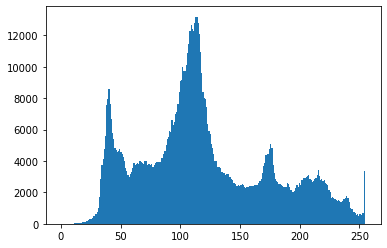

In [16]:
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("photo.jpg")
print("ball pic:",src.shape)
plt.hist(src.ravel(),256)

ball pic: (78, 80, 3)


(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,   2.,   1.,   1.,   8.,   8.,   0.,   8.,
         16.,  20.,  29.,  14.,  23.,  29.,  35.,  37.,   0.,  42.,  46.,
         52.,  50.,  66.,  85., 109., 138., 136.,   0., 146., 210., 181.,
        204., 217., 289., 259., 293., 246., 260.,   0., 219., 219., 264.,
        270., 279., 243., 205., 191., 230.,   0., 271., 210., 164., 154.,
        163., 179., 240., 180., 141.,   0., 110., 144., 132., 127., 126.,
        126., 136., 120., 127.,   0., 134., 118., 118.,  80., 114., 122.,
        120., 131., 163., 150.,   0., 164., 147., 155., 117., 112., 122.,
        103., 103., 101.,   0., 106., 115.,  84., 101.,  98.,  91.,  94.,
         82.,  80.,   0.,  76.,  66.,  91.,  85.,  85.,  77.,  90.,  81.,
         53.,   0.,  70.,  64.,  67.,  77.,  91.,  90.,  93., 103., 102.,
        117.,   0., 121., 112., 108., 101.,  94., 129.,  90., 117., 108.,
          0., 132., 191., 179., 175., 

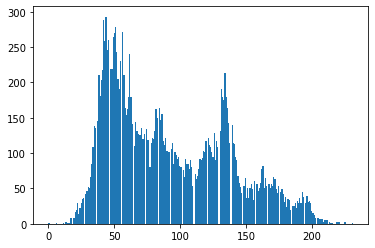

In [17]:
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("redBall2.jpg")
print("ball pic:",src.shape)
plt.hist(src.ravel(),256)